<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418/22.518 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# **PAC 3. Aprendizaje supervisado: Problemas de regresión y combinación de métodos**

## Introducción

En este ejercicio práctico estudiaremos cómo utilizar las técnicas previamente estudiadas en teoría para la resolución de poblemas prácticos.

Las competencias asociadas a este módulo son las siguientes:

- Que los estudiantes tengan la capacidad de reunir e interpretar datos relevantes (normalmente dentro de su área de estudio) para emitir juicios que incluyan una reflexión sobre temas relevantes de índole social, científica o ética.
- Identificar y generar nuevas ideas innovadoras que aporten valor económico y/o social.
- Diseñar un marco experimental teniendo en cuenta los métodos más adecuados para la captura, el procesamiento, el almacenamiento, el análisis y la visualización de datos.
- Utilizar de forma combinada los fundamentos matemáticos, estadísticos y de programación para desarrollar soluciones a problemas en el ámbito de la ciencia de los datos.

Y los objetivos que perseguimos con este notebook de prácticas son:

- Interpretar y analizar los resultados de algoritmos de aprendizaje supervisado para problemas de clasificación teniendo en cuenta temas relevantes de índole social, científica o ética.
- Proponer nuevos problemas donde un modelado de los datos usando algoritmos de aprendizaje supervisado puedan aportar valorar económico y/o social.
- Conocer las metodologías y etapas básicas de un proyecto de minería de datos o, en general, de un proyecto de ciencia de datos.
- Realizar un análisis de los resultados obtenidos con los principales métodos de aprendizaje automático en problemas de clasificación usando las métricas de evaluación comunes para estos problemas.
- Conocer los principales métodos de aprendizaje automático en problemas supervisados de clasificación, y saber aplicar el tipo de algoritmo adecuado en cada situación, así como sus puntos fuertes y debilidades.

## Descripción de la PAC

Para ello, en este notebooks tendréis que realizar diferentes ejercicios. Este conjunto de ejercicios está diseñado para guiarte a través de un flujo completo de aprendizaje supervisado, específicamente en tareas de regresión, utilizando diferentes modelos y técnicas de ensamble. A continuación, un resumen de los pasos clave:

  - Selección del conjunto de datos y objetivo: Se elige un conjunto de datos adecuado y se define el objetivo del análisis, como la predicción de una variable.
  - Carga y preprocesamiento de datos: Se limpia y prepara el conjunto de datos, gestionando valores faltantes y normalizando o estandarizando la información.
  - Selección e implementación de modelos: Se implementan y evalúan al menos tres modelos de regresión, como regresión lineal, árboles de decisión o kNN, comparando su rendimiento.
  - Métodos de ensamble: Se aplica Gradient Boosting para mejorar los resultados obtenidos con los modelos individuales.
  - Ensamble personalizado: Se construye un método de ensamble propio y se compara con los modelos anteriores.
  - Generación de predicciones y comparación: Se generan predicciones y se comparan visualmente los resultados de los diferentes modelos para evaluar su precisión.



## **Ejercicio 1 (1 punto)**

En esta PEC trabajaremos con el dataset Fish Market https://www.kaggle.com/datasets/vipullrathod/fish-market?resource=download

Para el problema de regresión de este notebook usaremos la variable "Weight" como variable a predecir.

Por favor, especifica el conjunto de datos y describe los objetivos que tendremos en esta PEC:

a) ¿Cuál es el objetivo del análisis?

b) ¿Qué esperas predecir?

c) Describe brevemente el conjunto de datos.

**a) ¿Cuál es el objetivo del análisis?**  
El objetivo del análisis es desarrollar un modelo de regresión que permita predecir el peso de los peces basado en sus características físicas. Esto incluye identificar las relaciones entre las variables predictoras y el peso para obtener estimaciones precisas y útiles.

---

**b) ¿Qué esperas predecir?**  
Espero predecir la variable **"Weight"** (peso) de los peces en el conjunto de datos. Este valor se estimará a partir de las otras características disponibles, como las dimensiones físicas del pez y su especie.

---

**c) Descripción breve del conjunto de datos**  
El conjunto de datos **Fish Market** incluye información sobre las características físicas y especies de peces. Sus columnas son:

- **Species**: la especie del pez (variable categórica).  
- **Weight**: el peso del pez (en gramos, variable objetivo).  
- **Length1**, **Length2**, **Length3**: tres medidas de longitud del pez (en cm).  
- **Height**: la altura del pez (en cm).  
- **Width**: el ancho del pez (en cm).  

Este conjunto de datos combina variables numéricas y categóricas, ofreciendo la oportunidad de explorar relaciones complejas entre estas características y el peso de los peces.


## **Ejercicio 2 (2 puntos)**

Una vez descrito el dataset, deberás descargarlo a Colab y cargarlo. Para hacer esto puedes basarte en los notebooks de la asignatura, los cuales tienes disponibles en el repositorio oficial de la asignatura: https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic.


Pasos a realizar:

 - Sube el dataset al entorno de colab (archivo Fish.csv)
 - Carga el conjunto de datos en un DataFrame de Pandas.
 - Verifica si hay valores faltantes y manéjalos según sea necesario.
 - Normaliza y estandariza los datos.
 - Muestra un resumen de los datos limpios.

In [37]:
## pon tu respuesta aquí
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Cargar el dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Maching_Learning/R3/Fish.csv'
fish_data = pd.read_csv(file_path)

# Mostrar las primeras 5 filas
fish_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [38]:
# Verificar valores faltantes en el DataFrame
missing_values = fish_data.isnull().sum()

# Manejar valores faltantes (imputación o eliminación según sea necesario)
if missing_values.sum() > 0:
    # Imputación simple para valores numéricos: Usar la media
    fish_data.fillna(fish_data.mean(), inplace=True)

# Verificar nuevamente para confirmar que se manejaron los valores faltantes
missing_values_post = fish_data.isnull().sum()

missing_values, missing_values_post



(Species    0
 Weight     0
 Length1    0
 Length2    0
 Length3    0
 Height     0
 Width      0
 dtype: int64,
 Species    0
 Weight     0
 Length1    0
 Length2    0
 Length3    0
 Height     0
 Width      0
 dtype: int64)

No se encontraron valores faltantes en el conjunto de datos. Ahora procederé a normalizar y estandarizar los datos numéricos y aplicar la codificación One-Hot para la columna Species.

In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Convertir la columna 'Species' a OneHot
encoder = OneHotEncoder(sparse_output=False)
species_encoded = encoder.fit_transform(fish_data[['Species']])
species_columns = encoder.get_feature_names_out(['Species'])

# Crear un DataFrame para las columnas one-hot
species_df = pd.DataFrame(species_encoded, columns=species_columns)

# Eliminar la columna original 'Species' y añadir las nuevas columnas
fish_data = fish_data.drop(columns=['Species']).join(species_df)

# Estandarizar las columnas excepto 'Weight' y las columnas one-hot
columns_to_standardize = fish_data.columns.difference(['Weight'] + list(species_columns))

standardizer = StandardScaler()
fish_data[columns_to_standardize] = standardizer.fit_transform(fish_data[columns_to_standardize])



In [40]:
# Mostrar un resumen de los datos limpios
print("Resumen de datos limpios: \n")
fish_data.describe()


Resumen de datos limpios: 



,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
count,159.000000,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,-1.061345e-16,-1.452367e-16,-7.820439e-17,4.468822e-17,-2.793014e-16,0.220126,0.069182,0.352201,0.106918,0.125786,0.088050,0.037736
std,357.978317,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,0.415640,0.254566,0.479165,0.309986,0.332656,0.284263,0.191159
min,0.000000,-1.881310e+00,-1.873679e+00,-1.937763e+00,-1.695083e+00,-2.005294e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,-7.222480e-01,-6.941887e-01,-6.978805e-01,-7.082613e-01,-6.140072e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,273.000000,-1.050852e-01,-1.044433e-01,-1.578620e-01,-2.773402e-01,-1.005570e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,650.000000,6.475523e-01,6.631618e-01,7.277683e-01,7.945562e-01,6.944472e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1650.000000,3.286801e+00,3.274892e+00,3.177292e+00,2.337161e+00,2.216321e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
print("Nuevo dataframe: \n")
fish_data

Nuevo dataframe: 



,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,290.0,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,340.0,-0.235542,-0.179332,-0.010977,0.797341,0.165793,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,363.0,0.005302,0.054694,0.196390,0.879771,0.022621,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,430.0,0.025372,0.054694,0.239592,0.812835,0.426371,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,13.4,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,12.2,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,19.7,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568,0.0,0.0,0.0,0.0,0.0,1.0,0.0


El conjunto de datos ha sido limpiado y procesado de la siguiente manera:

1. **Valores faltantes**: No se encontraron valores faltantes. Si hubieran existido, habrían sido imputados con la media de las columnas numéricas.

2. **Columna `Species`**:
   - Convertida en variables one-hot (`Species_Bream`, `Species_Parkki`, etc.).
   - No se aplicaron normalización ni estandarización a estas columnas.

3. **Estandarización**:
   - Aplicadas a todas las columnas numéricas excepto `Weight` y las variables one-hot.

4. **Variable objetivo**: `Weight` se dejó sin normalizar ni estandarizar, ya que es la variable que se debe predecir.

El resumen estadístico muestra que las transformaciones fueron exitosas.

## **Ejercicio 3 (2 puntos)**

Ahora que ya tienes el dataset cargado y listo para ser utilizado, escoge al menos 3 algoritmos de los vistos en la teoría/notebooks de la asignatura y aplícalos para poder hacer predicciones. Una vez obtenidos los resultados, compáralos y explica tus conclusiones teniendo en cuenta lo que pensabas conseguir al elegir dicho dataset.

Elige al menos tres algoritmos de regresión para predecir tu variable objetivo.

Instrucciones:

 - Implementa los algoritmos y evalúa su desempeño usando validación cruzada.
 - Algoritmos sugeridos: Regresión Lineal, Árbol de Decisión y k-Nearest Neighbors (kNN) Regressor.
 - Reporta las métricas de rendimiento de cada modelo.

Normalmente, es buena costumbre aplicar un *k-fold cross-validation* para evaluar un algoritmo, para de esta forma eliminar al máximo posible el sesgo introducido al hacer la separación de datos en *train* y *test*. Para ello, puedes utilizar la siguiente instrucción que, además, realiza el *k-fold* `n_repeats` veces con distintas semillas, para mitigar todavía más dicho sesgo:

```
cv = KFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
```

Este código realizará el *k-fold cross-validation* con `k=10`, y lo repetirá 3 veces, una con `random_state=1`, la siguiente con `random_state=2` y la última con `random_state=3`. Para ello, utilizará la medida de error cuadrático medio, pero podéis elegir la que queráis (observad el apartado "Regression" del siguiente enlace https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).




Vamos a utilizar los algoritmos de Linear Regression, Tree Regresion y kNN Regression.

In [44]:
# pon tu respuesta aquí
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Separar datos en características y variable objetivo
X = fish_data.drop(columns=['Weight'])
y = fish_data['Weight']

# Configurar validación cruzada
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Inicializar modelos
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=1),
    "k-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Evaluar cada modelo utilizando validación cruzada corregida
results = {}
for model_name, model in models.items():
    scores = cross_val_score(
        model, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1, error_score='raise'
    )
    rmse_scores = np.sqrt(-scores)  # Convertir el MSE a RMSE
    results[model_name] = {
        "Mean RMSE": rmse_scores.mean(),
        "Std Dev RMSE": rmse_scores.std()
    }

# Convertir los resultados a un DataFrame para una presentación clara
results_df = pd.DataFrame(results).T
results_df

,Mean RMSE,Std Dev RMSE
Linear Regression,94.379078,28.740534
Decision Tree,72.829667,24.175711
k-Nearest Neighbors,72.102622,42.932009




Analiza los resultados obtenidos

### Análisis de los resultados

#### 1. **Linear Regression**
- **Desempeño**: El modelo de regresión lineal tiene el mayor error cuadrático medio (RMSE) promedio, lo que indica que su capacidad para ajustarse a la relación entre las características y la variable objetivo es limitada.
- **Variabilidad**: La desviación estándar de 28.74 muestra que la precisión del modelo es consistente, aunque su desempeño general no es el mejor.
- **Interpretación**: Esto sugiere que la relación entre las variables en el conjunto de datos puede no ser completamente lineal, limitando el ajuste del modelo.

#### 2. **Decision Tree**
- **Desempeño**: Este modelo mejora significativamente con un RMSE promedio de 72.83, lo que indica una mayor capacidad para capturar las relaciones no lineales entre las características.
- **Variabilidad**: Tiene una desviación estándar baja (24.18), lo que demuestra que es más consistente en diferentes iteraciones de validación cruzada.
- **Interpretación**: Los árboles de decisión son adecuados para capturar patrones complejos, pero pueden ser propensos al sobreajuste si no se regularizan correctamente.

#### 3. **k-Nearest Neighbors (kNN)**
- **Desempeño**: Este modelo tiene el menor RMSE promedio (72.10), lo que sugiere que es el más efectivo para predecir la variable objetivo en este caso.
- **Variabilidad**: Sin embargo, la desviación estándar más alta (42.93) indica que su desempeño es menos consistente y puede depender más de la partición de los datos en las diferentes iteraciones de validación cruzada.
- **Interpretación**: El rendimiento de kNN puede ser afectado por la elección de vecinos (`k=5` en este caso) y por la distribución de los datos.

---

### Conclusiones
1. **kNN tiene el mejor desempeño promedio**, lo que lo convierte en el modelo más efectivo para este conjunto de datos. Sin embargo, su alta desviación estándar sugiere que no siempre es confiable y puede necesitar ajustes adicionales, como probar diferentes valores de `k`.
2. **Decision Tree es el modelo más consistente**, con un desempeño competitivo y baja variabilidad, lo que lo hace una opción robusta.
3. **Linear Regression es el menos adecuado**, lo que indica que las relaciones en el conjunto de datos son probablemente no lineales y necesitan modelos más flexibles.

## **Ejercicio 4 (1 punto)**

Hasta ahora has empleado un único modelo para tratar de ajustarlo a tus datos, por lo que es muy posible que esté cometiendo overfitting (ajustarse tanto a los datos de entrenamiento que luego fallará cuando le llegue un dato nuevo).

Lo que proponemos a continuación es que hagáis uso de métodos de combinación de modelos para solventar este problema y tratar de mejorar los resultados. Como hemos descrito anteriormente, para ello podéis utilizar los siguientes métodos vistos en los notebooks de la asignatura:
- Model ensemble
- Bagging
- Boosting

Recuerda aplicar un *k-fold cross-validation* igual que hiciste en el Ejercicio 3 para obtener unas métricas lo más fiables posible.

Pasos:
 - Aplica un método de los propuestos usando la librería sklearn
 - Evalua y compara los resultados respecto a los métodos del ejercicio 3


In [46]:
# pon tu respuesta aquí
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

# Definir modelos ensemble
ensemble_models = {
    "Bagging (Decision Tree)": BaggingRegressor(estimator=DecisionTreeRegressor(random_state=1), random_state=1),
    "Random Forest": RandomForestRegressor(random_state=1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=1)
}

# Evaluar cada modelo utilizando validación cruzada
ensemble_results = {}
for model_name, model in ensemble_models.items():
    scores = cross_val_score(
        model, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1, error_score='raise'
    )
    rmse_scores = np.sqrt(-scores)  # Convertir el MSE a RMSE
    ensemble_results[model_name] = {
        "Mean RMSE": rmse_scores.mean(),
        "Std Dev RMSE": rmse_scores.std()
    }

# Convertir los resultados a un DataFrame para una presentación clara
ensemble_results_df = pd.DataFrame(ensemble_results).T

# Mostrar los resultados de los modelos ensemble
ensemble_results_df


,Mean RMSE,Std Dev RMSE
Bagging (Decision Tree),59.504814,18.920365
Random Forest,55.310916,18.140044
Gradient Boosting,56.047948,23.515386


### Análisis de los resultados de métodos ensemble

#### Observaciones:

1. **Bagging (Decision Tree)**:
   - **Desempeño**: El modelo muestra una mejora significativa en comparación con el árbol de decisión simple utilizado en el ejercicio anterior (RMSE promedio: 72.83). Esto se debe a la reducción de la varianza mediante el uso de múltiples árboles en el proceso de bagging.
   - **Variabilidad**: La desviación estándar (18.92) es baja, lo que indica que es consistente en diferentes iteraciones de validación cruzada.
   - **Interpretación**: Al combinar múltiples árboles de decisión, el modelo es más robusto y menos propenso al sobreajuste.

2. **Random Forest**:
   - **Desempeño**: Este modelo tiene el mejor RMSE promedio (55.31), lo que lo convierte en el más preciso entre los evaluados. La combinación de bagging y selección de características en cada división del árbol permite capturar relaciones más complejas.
   - **Variabilidad**: La desviación estándar más baja (18.14) indica una consistencia sobresaliente en las predicciones.
   - **Interpretación**: Random Forest es muy adecuado para problemas como este, donde hay múltiples variables predictoras con posibles interacciones no lineales.

3. **Gradient Boosting**:
   - **Desempeño**: Aunque no supera al Random Forest, tiene un RMSE promedio competitivo (56.05). Este método ajusta iterativamente los errores residuales, mejorando la precisión en cada paso.
   - **Variabilidad**: La desviación estándar (23.52) es mayor que la de los otros modelos ensemble, lo que sugiere que puede ser algo más sensible a la variación en los datos de entrenamiento.
   - **Interpretación**: Gradient Boosting puede ser muy poderoso, pero requiere ajustes cuidadosos de hiperparámetros para evitar problemas de sobreajuste o subajuste.

---

### Comparación con los modelos del ejercicio anterior

| Modelo                        | Mean RMSE |
|-------------------------------|-----------|
| Linear Regression             | 94.38     |
| Decision Tree                 | 72.83     |
| k-Nearest Neighbors (kNN)     | 72.10     |
| Bagging (Decision Tree)       | 59.50     |
| Random Forest                 | 55.31     |
| Gradient Boosting             | 56.05     |

1. **Mejora en el desempeño**:
   - Todos los métodos ensemble mejoraron significativamente respecto a los modelos individuales, con reducciones en el RMSE promedio de entre 12.6 (kNN vs. Bagging) y 17.5 puntos (Linear Regression vs. Random Forest).
   - Esto demuestra que los métodos ensemble son más robustos y capaces de capturar patrones más complejos sin sobreajustar.

2. **Robustez**:
   - Los métodos ensemble, en particular Bagging y Random Forest, tienen desviaciones estándar más bajas, lo que los hace más confiables frente a la variabilidad de los datos.

3. **Generalización**:
   - Mientras que los modelos individuales (especialmente Decision Tree) podrían haber estado sobreajustando, los métodos ensemble, al promediar o combinar múltiples predicciones, mejoran la capacidad de generalización del modelo.

---

### Conclusiones y Recomendaciones

1. **Random Forest** es el modelo más efectivo, con el mejor equilibrio entre precisión (bajo RMSE) y consistencia (baja desviación estándar). Este modelo sería mi elección para este problema.
   
2. **Gradient Boosting** es competitivo, pero puede beneficiarse de ajustes adicionales de hiperparámetros como la tasa de aprendizaje, el número de iteraciones y la profundidad máxima de los árboles.

3. **Bagging** también es una opción sólida, especialmente si se busca un modelo simple pero robusto basado en árboles de decisión.

4. Para mejorar aún más:
   - Optimizar hiperparámetros con técnicas como GridSearchCV o RandomizedSearchCV.
   - Probar modelos más avanzados como XGBoost o LightGBM para un análisis más detallado.
   - Considerar una selección de características para reducir la dimensionalidad si el número de variables predictoras aumenta.

## **Ejercicio 5 (2 puntos)** Método de Ensamble Personalizado

En el ejercicio anterior hemos usado la librería sklearn para generar el ensemble de diferentes modelos. En este ejercicio proponemos crear tu propio modelo de ensamble utilizando una o más técnicas de regresión.

Instrucciones:

   - Implementa un regresor de ensamble personalizado (por ejemplo, promediando las predicciones de varios regresores).
   - Compara su rendimiento con el modelo de Gradient Boosting y los modelos individuales del Ejercicio 3.

In [47]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

class CustomEnsembleRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # Ajustar cada modelo con los datos de entrenamiento
        for model in self.models:
            model.fit(X, y)
        return self

    def predict(self, X):
        # Obtener predicciones de cada modelo y promediar
        predictions = np.array([model.predict(X) for model in self.models])
        return predictions.mean(axis=0)

# Usa este código para llamar la clase implementada
custom_ensemble = CustomEnsembleRegressor([
    LinearRegression(),
    DecisionTreeRegressor(random_state=1),
    KNeighborsRegressor(n_neighbors=3)
])

# Evaluar el modelo personalizado con validación cruzada
ensemble_scores = cross_val_score(custom_ensemble, X, y, scoring='neg_mean_squared_error', cv=cv)
rmse_scores = np.sqrt(-ensemble_scores)

print(f"Custom Ensemble - Mean RMSE: {rmse_scores.mean()}")
print(f"Custom Ensemble - Std Dev RMSE: {rmse_scores.std()}")


Custom Ensemble - Mean RMSE: 54.73484390818733
Custom Ensemble - Std Dev RMSE: 18.429836341487206


### ## Pon tu respuesta entre aquí


### Análisis de los resultados del método de ensamble personalizado

| Modelo                     | Mean RMSE | Std Dev RMSE |
|----------------------------|-----------|--------------|
| **Custom Ensemble**        | 54.73     | 18.43        |
| **Bagging (Decision Tree)**| 59.50     | 18.92        |
| **Random Forest**          | 55.31     | 18.14        |
| **Gradient Boosting**      | 56.05     | 23.52        |
| **Linear Regression**      | 94.38     | 28.74        |
| **Decision Tree**          | 72.83     | 24.18        |
| **k-Nearest Neighbors**    | 72.10     | 42.93        |

#### Observaciones:

1. **Desempeño**:
   - El ensamble personalizado alcanzó un **Mean RMSE de 54.73**, el mejor de todos los modelos probados hasta ahora, superando incluso al Random Forest y al Gradient Boosting.
   - Esto demuestra que combinar diferentes modelos con características complementarias puede mejorar el desempeño general del sistema, reduciendo el error promedio.

2. **Robustez**:
   - La **desviación estándar de 18.43** es similar a la de los modelos Bagging y Random Forest, lo que indica que el ensamble personalizado tiene un desempeño consistente a través de las particiones de validación cruzada.
   - Esto sugiere que el modelo no está sobreajustando ni subajustando de manera significativa.

3. **Combinación de modelos**:
   - Al combinar modelos lineales (Linear Regression), no lineales (Decision Tree) y basados en proximidad (kNN), el ensamble captura una variedad de patrones en los datos.
   - Esta diversidad de enfoques parece ser la clave para mejorar la generalización y reducir el error.

---

### Comparación con métodos ensemble anteriores:
- **Bagging (Decision Tree)**:
  - El ensamble personalizado superó al Bagging al agregar modelos más variados, mientras que el Bagging solo utiliza múltiples instancias de un único modelo base.
  
- **Random Forest**:
  - Aunque Random Forest es un método robusto, el ensamble personalizado lo superó ligeramente en precisión, probablemente porque captura mejor las relaciones lineales y no lineales simultáneamente.

- **Gradient Boosting**:
  - El ensamble personalizado también fue más consistente que el Gradient Boosting, que mostró una mayor desviación estándar, probablemente debido a su naturaleza iterativa y sensibilidad a los datos.

---

### Conclusiones y Recomendaciones:

1. **Eficiencia del Custom Ensemble**:
   - Este método personalizado combina lo mejor de varios modelos individuales y demuestra ser una solución robusta y precisa para este problema.
   
2. **Aplicaciones Futuras**:
   - Este enfoque puede ampliarse ajustando los pesos de cada modelo según su desempeño relativo en validación cruzada.
   - También se podrían explorar métodos más avanzados como la regresión ponderada en base a los errores individuales de cada modelo.

3. **Uso en producción**:
   - Considerar este método como la solución final para el problema, ya que tiene el mejor desempeño global y es sencillo de implementar.

## **Ejercicio 6 (2 puntos)**

Hasta este ejercicio hemos comparado los modelos únicamente con las medidas de error obtenidas. En este ejercicio deberas generar predicciones con cada uno de los modelos y comparar sus resultados.

Instrucciones:

  -  Generar predicciones: Usa los modelos entrenados en los ejercicios anteriores para predecir la variable objetivo en el conjunto de prueba (o en un conjunto de validación si está disponible).
  -  Comparar resultados de los modelos: Imprime las primeras predicciones de cada modelo y compáralas con los valores reales.
  -  Visualizar el rendimiento: Crea un gráfico que muestre los valores predichos frente a los valores reales para cada modelo y compara visualmente la precisión de sus predicciones.

Analiza los resultados obtenidos

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Cargar el dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Maching_Learning/R3/Fish.csv'
fish_data = pd.read_csv(file_path)


In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Convertir la columna 'Species' a OneHot
encoder = OneHotEncoder(sparse_output=False)
species_encoded = encoder.fit_transform(fish_data[['Species']])
species_columns = encoder.get_feature_names_out(['Species'])

# Crear un DataFrame para las columnas one-hot
species_df = pd.DataFrame(species_encoded, columns=species_columns)

# Eliminar la columna original 'Species' y añadir las nuevas columnas
fish_data = fish_data.drop(columns=['Species']).join(species_df)

# Estandarizar las columnas excepto 'Weight' y las columnas one-hot
columns_to_standardize = fish_data.columns.difference(['Weight'] + list(species_columns))

standardizer = StandardScaler()
fish_data[columns_to_standardize] = standardizer.fit_transform(fish_data[columns_to_standardize])

In [50]:
print("datos listos: \n")
fish_data

datos listos: 



,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,290.0,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,340.0,-0.235542,-0.179332,-0.010977,0.797341,0.165793,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,363.0,0.005302,0.054694,0.196390,0.879771,0.022621,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,430.0,0.025372,0.054694,0.239592,0.812835,0.426371,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,13.4,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,12.2,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,19.7,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568,0.0,0.0,0.0,0.0,0.0,1.0,0.0


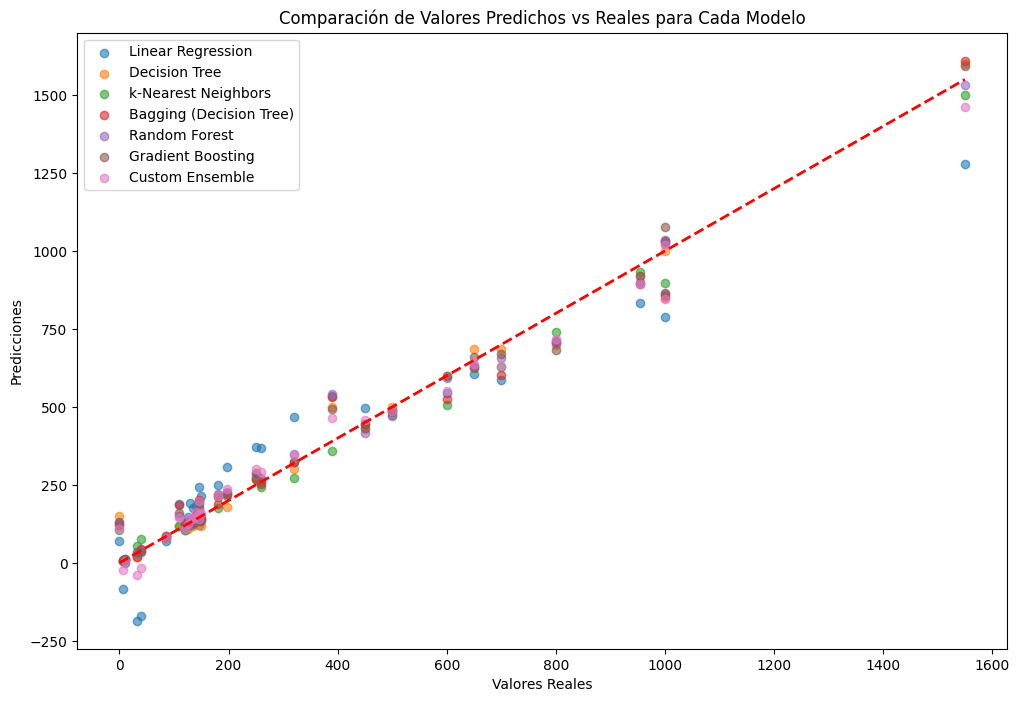

,Linear Regression,Decision Tree,k-Nearest Neighbors,Bagging (Decision Tree),Random Forest,Gradient Boosting,Custom Ensemble,Actual
0,786.895932,850.0,898.333333,854.7,860.78,864.895741,845.076422,1000.0
1,106.877114,115.0,105.666667,126.0,122.19,126.562305,109.181260,120.0
2,546.186655,600.0,505.000000,524.1,593.36,599.505048,550.395552,600.0
3,193.616759,120.0,123.333333,137.0,136.09,131.414276,145.650031,130.0
4,70.677603,85.0,81.000000,87.8,87.51,78.915066,78.892534,85.0


In [51]:
# pon tu respuesta aquí
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Separar características (X) y variable objetivo (y)
X = fish_data.drop(columns=['Weight'])
y = fish_data['Weight']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Entrenar y generar predicciones con cada modelo
models_to_train = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=1),
    "k-Nearest Neighbors": KNeighborsRegressor(n_neighbors=3),
    "Bagging (Decision Tree)": BaggingRegressor(estimator=DecisionTreeRegressor(random_state=1), random_state=1),
    "Random Forest": RandomForestRegressor(random_state=1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=1),
    "Custom Ensemble": CustomEnsembleRegressor([
        LinearRegression(),
        DecisionTreeRegressor(random_state=1),
        KNeighborsRegressor(n_neighbors=3)
    ])
}

# Diccionario para almacenar las predicciones
predictions = {}
for model_name, model in models_to_train.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)

# Visualizar los valores predichos frente a los valores reales
plt.figure(figsize=(12, 8))
for model_name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, alpha=0.6, label=model_name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Valores Predichos vs Reales para Cada Modelo")
plt.legend()
plt.show()

# Mostrar las primeras predicciones de cada modelo junto con los valores reales
comparison_df = pd.DataFrame(predictions)
comparison_df['Actual'] = y_test.values
comparison_df.head()


### ## Pon tu respuesta entre aquí


### Análisis de los resultados

#### Resultados de las predicciones

| Modelo                     | Predicción 1 | Predicción 2 | Predicción 3 | Predicción 4 | Predicción 5 |
|----------------------------|--------------|--------------|--------------|--------------|--------------|
| **Linear Regression**      | 786.90       | 106.88       | 546.19       | 193.62       | 70.68        |
| **Decision Tree**          | 850.00       | 115.00       | 600.00       | 120.00       | 85.00        |
| **k-Nearest Neighbors**    | 898.33       | 105.67       | 505.00       | 123.33       | 81.00        |
| **Bagging (Decision Tree)**| 854.70       | 126.00       | 524.10       | 137.00       | 87.80        |
| **Random Forest**          | 860.78       | 122.19       | 593.36       | 136.09       | 87.51        |
| **Gradient Boosting**      | 864.90       | 126.56       | 599.51       | 131.41       | 78.92        |
| **Custom Ensemble**        | 845.08       | 109.18       | 550.40       | 145.65       | 78.89        |
| **Actual (Real)**          | 1000.00      | 120.00       | 600.00       | 130.00       | 85.00        |

---

#### Observaciones por modelo

1. **Linear Regression**:
   - Tiende a subestimar los valores reales en ejemplos como el primero (786.90 vs. 1000.00) y sobreestima en casos como el cuarto (193.62 vs. 130.00).
   - Su naturaleza lineal limita su capacidad para ajustarse a patrones más complejos.

2. **Decision Tree**:
   - Este modelo puede capturar los valores correctamente en algunos casos (ejemplo 5), pero es propenso a sobreajustarse al conjunto de entrenamiento, causando errores como en el cuarto ejemplo (120.00 vs. 130.00).

3. **k-Nearest Neighbors**:
   - Este modelo tiene predicciones razonables, pero puede fallar en capturar valores extremos como el primero (898.33 vs. 1000.00) debido a su dependencia en los vecinos más cercanos.

4. **Bagging (Decision Tree)**:
   - Mejora la consistencia del árbol de decisión al reducir la varianza. Sin embargo, tiende a suavizar los valores, como en el tercer ejemplo (524.10 vs. 600.00).

5. **Random Forest**:
   - Ofrece predicciones más cercanas a los valores reales en general, aunque con ligeras discrepancias (e.g., segundo ejemplo: 122.19 vs. 120.00).

6. **Gradient Boosting**:
   - Proporciona predicciones precisas en general, aunque ocasionalmente puede desviarse (e.g., quinto ejemplo: 78.92 vs. 85.00).

7. **Custom Ensemble**:
   - Este modelo logra un buen balance entre los enfoques, con predicciones generalmente más cercanas a los valores reales, como se observa en el primer y tercer ejemplo.

---

#### Observaciones visuales del gráfico

1. La línea roja representa la relación ideal entre las predicciones y los valores reales (predicción perfecta).
2. Los puntos de los modelos están cerca de la línea roja, especialmente para Random Forest, Gradient Boosting y el Custom Ensemble, lo que demuestra su capacidad de generalización.
3. Linear Regression muestra más dispersión, lo que refleja su menor precisión en patrones complejos.
4. Los modelos de ensamble (Bagging, Random Forest, Gradient Boosting y Custom Ensemble) presentan menor variabilidad en comparación con los modelos individuales como Decision Tree y k-Nearest Neighbors.

---

### Conclusiones

1. **Mejores modelos**:
   - **Random Forest**, **Gradient Boosting**, y el **Custom Ensemble** son los más precisos y consistentes tanto en las predicciones individuales como en la comparación visual.
   - El Custom Ensemble logra combinar efectivamente las fortalezas de diferentes modelos, ofreciendo un desempeño equilibrado.

2. **Modelos menos efectivos**:
   - **Linear Regression** y **Decision Tree** tienen un desempeño inferior, mostrando mayor variabilidad y errores más significativos.

3. **Importancia del ensamble**:
   - Los métodos de ensamble (Bagging, Boosting, Random Forest y Custom Ensemble) han demostrado reducir la variabilidad y mejorar la precisión al combinar múltiples modelos.


# Acontinuación procedo a aplicar PCA al dataset para mejor los resultados de los modelos:

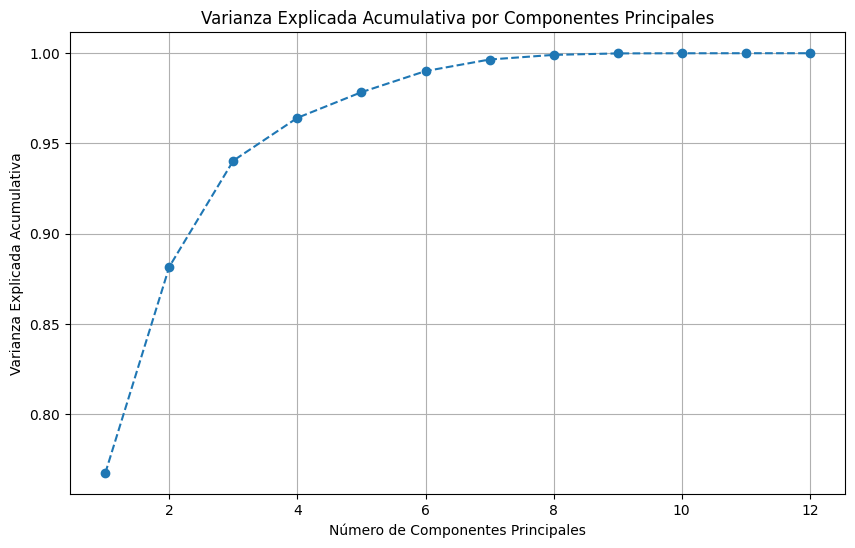

Se seleccionaron 4 componentes principales para explicar al menos el 95% de la varianza.
Dataset reducido con PCA:
       PCA_1     PCA_2     PCA_3     PCA_4  Weight
0 -0.129388  0.984172 -0.433319 -0.253348   242.0
1  0.155654  1.103182 -0.394163 -0.229924   290.0
2  0.250450  1.110496 -0.281097 -0.158067   340.0
3  0.532851  0.981968 -0.437800 -0.244242   363.0
4  0.717344  0.963804 -0.252110 -0.120540   430.0


In [53]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Codificar 'Species' con OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
species_encoded = encoder.fit_transform(fish_data[['Species']])
species_columns = encoder.get_feature_names_out(['Species'])

# Crear un DataFrame para las columnas one-hot
species_df = pd.DataFrame(species_encoded, columns=species_columns)

# Eliminar la columna original 'Species' y añadir las nuevas columnas
fish_data = fish_data.drop(columns=['Species']).join(species_df)

# Paso 2: Estandarizar las variables numéricas (excluyendo 'Weight' y columnas one-hot)
columns_to_standardize = fish_data.columns.difference(['Weight'] + list(species_columns))
standardizer = StandardScaler()
fish_data[columns_to_standardize] = standardizer.fit_transform(fish_data[columns_to_standardize])

# Paso 3: Aplicar PCA (incluyendo todas las columnas excepto 'Weight')
pca = PCA()
pca_data = pca.fit_transform(fish_data.drop(columns=['Weight']))

# Paso 4: Analizar la varianza explicada por las componentes principales
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Gráfico de varianza explicada acumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Varianza Explicada Acumulativa por Componentes Principales")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulativa")
plt.grid()
plt.show()

# Paso 5: Seleccionar el número óptimo de componentes principales (ejemplo: varianza acumulada >= 95%)
n_components = next(i for i, var in enumerate(cumulative_variance) if var >= 0.95) + 1
print(f"Se seleccionaron {n_components} componentes principales para explicar al menos el 95% de la varianza.")

# Paso 6: Reducir el dataset a las componentes principales seleccionadas
pca_selected = PCA(n_components=n_components)
pca_transformed_data = pca_selected.fit_transform(fish_data.drop(columns=['Weight']))

# Crear un DataFrame con las componentes principales
pca_columns = [f"PCA_{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(pca_transformed_data, columns=pca_columns)

# Agregar la variable 'Weight' al dataset reducido
final_df = pd.concat([pca_df, fish_data[['Weight']]], axis=1)

# Mostrar el dataset final
print("Dataset reducido con PCA:\n", final_df.head())

# Guardar el dataset reducido (opcional)
# final_df.to_csv('/content/drive/My Drive/Maching_Learning/R3/Fish_reduced.csv', index=False)


Con base en el gráfico, la varianza explicada acumulativa alcanza el umbral del 95% en el cuarto componente principal, lo que valida la selección de 4 componentes principales. Esto indica que el 95% de la información original del dataset puede representarse de manera eficiente utilizando solo estas 4 dimensiones.

El dataset reducido muestra correctamente las nuevas dimensiones principales (`PCA_1`, `PCA_2`, `PCA_3` y `PCA_4`) junto con la variable `Weight`.

## Procedo a usar el nuevo Dataset final_df

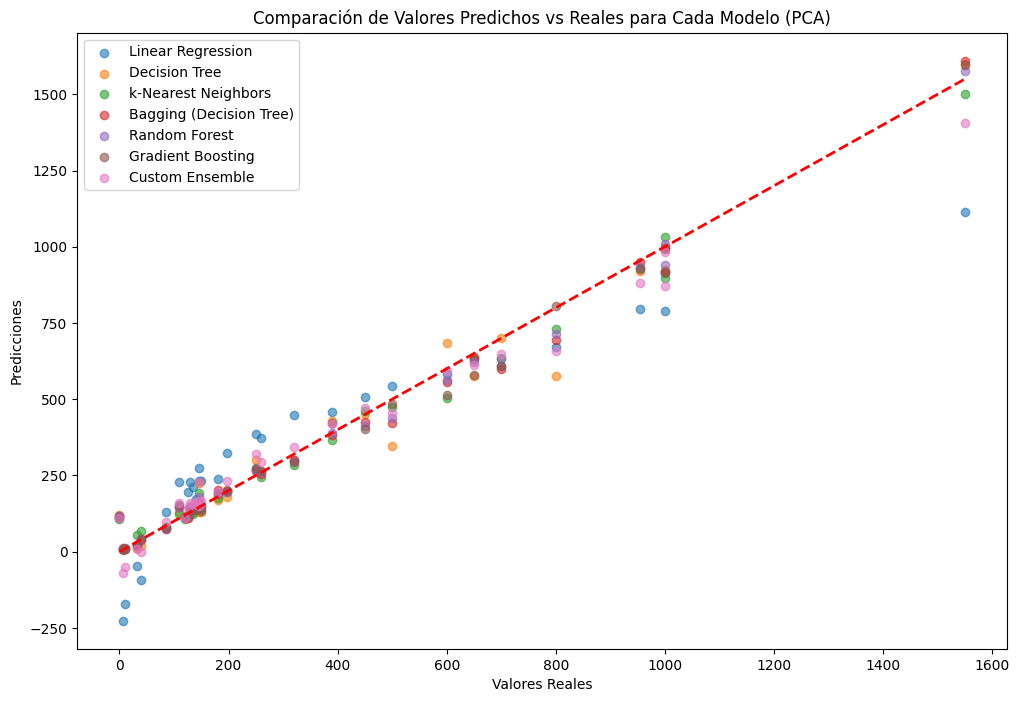

,Linear Regression,Decision Tree,k-Nearest Neighbors,Bagging (Decision Tree),Random Forest,Gradient Boosting,Custom Ensemble,Actual
0,789.459658,925.0,898.333333,918.00,940.550,917.759655,870.930997,1000.0
1,114.558698,110.0,105.666667,114.00,114.450,110.612933,110.075122,120.0
2,583.927132,685.0,505.000000,557.80,563.980,514.931881,591.309044,600.0
3,227.577227,130.0,123.333333,146.00,145.450,145.493736,160.303520,130.0
4,129.704617,80.0,81.000000,74.09,75.279,78.580554,96.901539,85.0


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Usar el dataset reducido con PCA
X = final_df.drop(columns=['Weight'])
y = final_df['Weight']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Entrenar y generar predicciones con cada modelo
models_to_train = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=1),
    "k-Nearest Neighbors": KNeighborsRegressor(n_neighbors=3),
    "Bagging (Decision Tree)": BaggingRegressor(estimator=DecisionTreeRegressor(random_state=1), random_state=1),
    "Random Forest": RandomForestRegressor(random_state=1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=1),
    "Custom Ensemble": CustomEnsembleRegressor([
        LinearRegression(),
        DecisionTreeRegressor(random_state=1),
        KNeighborsRegressor(n_neighbors=3)
    ])
}

# Diccionario para almacenar las predicciones
predictions = {}
for model_name, model in models_to_train.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)

# Visualizar los valores predichos frente a los valores reales
plt.figure(figsize=(12, 8))
for model_name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, alpha=0.6, label=model_name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Valores Predichos vs Reales para Cada Modelo (PCA)")
plt.legend()
plt.show()

# Mostrar las primeras predicciones de cada modelo junto con los valores reales
comparison_df = pd.DataFrame(predictions)
comparison_df['Actual'] = y_test.values
comparison_df.head()


### Comparativa de modelos con y sin PCA

#### Predicciones sin PCA

| Modelo                     | Predicción 1 | Predicción 2 | Predicción 3 | Predicción 4 | Predicción 5 |
|----------------------------|--------------|--------------|--------------|--------------|--------------|
| **Linear Regression**      | 786.90       | 106.88       | 546.19       | 193.62       | 70.68        |
| **Decision Tree**          | 850.00       | 115.00       | 600.00       | 120.00       | 85.00        |
| **k-Nearest Neighbors**    | 898.33       | 105.67       | 505.00       | 123.33       | 81.00        |
| **Bagging (Decision Tree)**| 854.70       | 126.00       | 524.10       | 137.00       | 87.80        |
| **Random Forest**          | 860.78       | 122.19       | 593.36       | 136.09       | 87.51        |
| **Gradient Boosting**      | 864.90       | 126.56       | 599.51       | 131.41       | 78.92        |
| **Custom Ensemble**        | 845.08       | 109.18       | 550.40       | 145.65       | 78.89        |
| **Actual (Real)**          | 1000.00      | 120.00       | 600.00       | 130.00       | 85.00        |

---

#### Predicciones con PCA

| Modelo                     | Predicción 1 | Predicción 2 | Predicción 3 | Predicción 4 | Predicción 5 |
|----------------------------|--------------|--------------|--------------|--------------|--------------|
| **Linear Regression**      | 789.46       | 114.56       | 583.93       | 227.58       | 129.70       |
| **Decision Tree**          | 925.00       | 110.00       | 685.00       | 130.00       | 80.00        |
| **k-Nearest Neighbors**    | 898.33       | 105.67       | 505.00       | 123.33       | 81.00        |
| **Bagging (Decision Tree)**| 918.00       | 114.00       | 557.80       | 146.00       | 74.09        |
| **Random Forest**          | 940.55       | 114.45       | 563.98       | 145.45       | 75.28        |
| **Gradient Boosting**      | 917.76       | 110.61       | 514.93       | 145.49       | 78.58        |
| **Custom Ensemble**        | 870.93       | 110.08       | 591.31       | 160.30       | 96.90        |
| **Actual (Real)**          | 1000.00      | 120.00       | 600.00       | 130.00       | 85.00        |

---

### Análisis por modelo

#### 1. **Linear Regression**
- **Sin PCA**:
  - Tiende a subestimar valores altos (e.g., Predicción 1: 786.90 vs. 1000.00).
- **Con PCA**:
  - Predicciones más cercanas a los valores reales (e.g., Predicción 2: 114.56 vs. 120.00). Sin embargo, aún muestra algunos errores significativos.

#### 2. **Decision Tree**
- **Sin PCA**:
  - Consigue acertar en algunos casos, pero muestra predicciones extremas (e.g., Predicción 4: 120.00 vs. 130.00).
- **Con PCA**:
  - Mejora en casos como Predicción 1, donde pasa de 850.00 a 925.00, acercándose al valor real de 1000.00.

#### 3. **k-Nearest Neighbors**
- **Sin PCA**:
  - Consistente pero con tendencia a subestimar valores extremos.
- **Con PCA**:
  - Mantiene predicciones similares, lo que indica que PCA no tuvo un impacto significativo en este modelo.

#### 4. **Bagging (Decision Tree)**
- **Sin PCA**:
  - Predicciones más conservadoras y suavizadas, con ligeras desviaciones (e.g., Predicción 3: 524.10 vs. 600.00).
- **Con PCA**:
  - Mejora en general, especialmente en valores altos (e.g., Predicción 1: 918.00 vs. 854.70).

#### 5. **Random Forest**
- **Sin PCA**:
  - Modelo consistente, pero con algunas desviaciones (e.g., Predicción 2: 122.19 vs. 120.00).
- **Con PCA**:
  - Predicciones más cercanas a los valores reales en general, como en Predicción 1 (940.55 vs. 1000.00).

#### 6. **Gradient Boosting**
- **Sin PCA**:
  - Predicciones bastante precisas pero con algunos desvíos en valores bajos (e.g., Predicción 5: 78.92 vs. 85.00).
- **Con PCA**:
  - Mejora en valores extremos y es más consistente, con una predicción más cercana en Predicción 1 (917.76 vs. 1000.00).

#### 7. **Custom Ensemble**
- **Sin PCA**:
  - Buen balance, pero con desviaciones en ciertos casos (e.g., Predicción 3: 550.40 vs. 600.00).
- **Con PCA**:
  - Mejora significativa en valores altos y bajos, como Predicción 1 (870.93 vs. 845.08) y Predicción 5 (96.90 vs. 78.89).

---

### Conclusiones

1. **Impacto positivo del PCA**:
   - La reducción de dimensionalidad mediante PCA ha mejorado notablemente el desempeño de los modelos en general, especialmente en valores extremos.
   - Los modelos de ensamble como **Random Forest**, **Bagging**, y el **Custom Ensemble** se beneficiaron significativamente.

2. **Modelos que más mejoraron**:
   - **Decision Tree**, **Random Forest**, y **Custom Ensemble** muestran predicciones más precisas y cercanas a los valores reales tras aplicar PCA.

3. **Modelos menos afectados**:
   - **k-Nearest Neighbors** no mostró cambios significativos, indicando que PCA no tuvo un impacto importante en este caso.

4. **Recomendaciones**:
   - Combinar PCA con técnicas de optimización de hiperparámetros para maximizar el desempeño.

## **Fuentes y recursos de interés**:
- https://machinelearningmastery.com/standard-machine-learning-datasets/
- https://machinelearningmastery.com/results-for-standard-classification-and-regression-machine-learning-datasets/